# Anders的Tensor总结

## 参考资料
    PyTorch官方教程中文版的PyTorch入门-->Tensors (张量)  不知道是不是官方，在官方没找到这个对应的内容
    https://www.pytorch123.com/SecondSection/what_is_pytorch/
    
    深度学习原理与pytorch实战(第2版）的第二章
    https://weread.qq.com/web/reader/b8c323d0813ab752fg0146c9k8f132430178f14e45fce0f7

    笔记《 深度学习原理与pytorch实战(第2版）》：https://docs.qq.com/doc/DVXJQWkl5bVF3WUJD
    



In [1]:
import torch

## 1.构建tensor

### 1.1 empty

In [2]:
# 构造一个5x3矩阵，不初始化。
x = torch.empty(5,3)
print(x)

tensor([[8.4490e-39, 9.6429e-39, 9.2755e-39],
        [1.0286e-38, 9.0919e-39, 8.9082e-39],
        [9.2755e-39, 8.4490e-39, 1.0194e-38],
        [9.0919e-39, 8.4490e-39, 9.3674e-39],
        [1.0102e-38, 1.0653e-38, 1.0469e-38]])


### 1.2 rand
https://pytorch.org/docs/stable/generated/torch.rand.html#torch.rand


In [3]:
# 构造一个随机初始化的矩阵
x = torch.rand(5, 3)
# 一层括号是一维数组，下面的是两层括号，所以是2维数组
print(x)

tensor([[0.1050, 0.3523, 0.8270],
        [0.0220, 0.7063, 0.1063],
        [0.4928, 0.6044, 0.0394],
        [0.5439, 0.0721, 0.4068],
        [0.7728, 0.7462, 0.3891]])


### 1.3 randint
https://pytorch.org/docs/stable/generated/torch.randint.html

In [3]:
t1 = torch.randint(3, 5, (3,))
print(t1)
t2 = torch.randint(10, (2, 2))
print(t2)
t3 = torch.randint(3, 10, (2, 2))
print(t3)


tensor([3, 3, 3])
tensor([[4, 1],
        [2, 3]])
tensor([[4, 3],
        [4, 4]])


### 1.4 randn函数和方差的概念
https://pytorch.org/docs/stable/generated/torch.randn.html?highlight=rand#torch.randn

生成一组随机数，平均值为0，方差为1

方差的概念：

有 1、2、3、4、5这组样本，其平均数为（1+2+3+4+5）/5=3，而方差是各个数据分别与其和的平均数之差的平方的和的平均数，则为：

[(1-3)^2+(2-3)^2+(3-3)^2+(4-3)^2+(5-3)^2]/5=2，方差为2。


In [4]:
weights = torch.randn((5, 3), dtype = torch.double, requires_grad = True)
print(weights)
# 求平均值，平均值应为0，因为是随机数，所以数字越多，越接近0
m = torch.mean(weights)
print(m)
# 求差值的平方,应为1. 因为是随机数，所以数字越多，越接近1
the_square = (weights - m)**2
mean = the_square.mean()
print(mean)

tensor([[-0.0321,  0.4403, -2.6117],
        [ 0.4518, -0.5331, -0.5640],
        [-0.4741,  1.0935,  0.4069],
        [ 1.0957, -2.1991,  1.3890],
        [ 0.6205,  1.6665,  1.6566]], dtype=torch.float64, requires_grad=True)
tensor(0.1604, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor(1.5263, dtype=torch.float64, grad_fn=<MeanBackward0>)


tensor(0.0348)
tensor(1.0043)


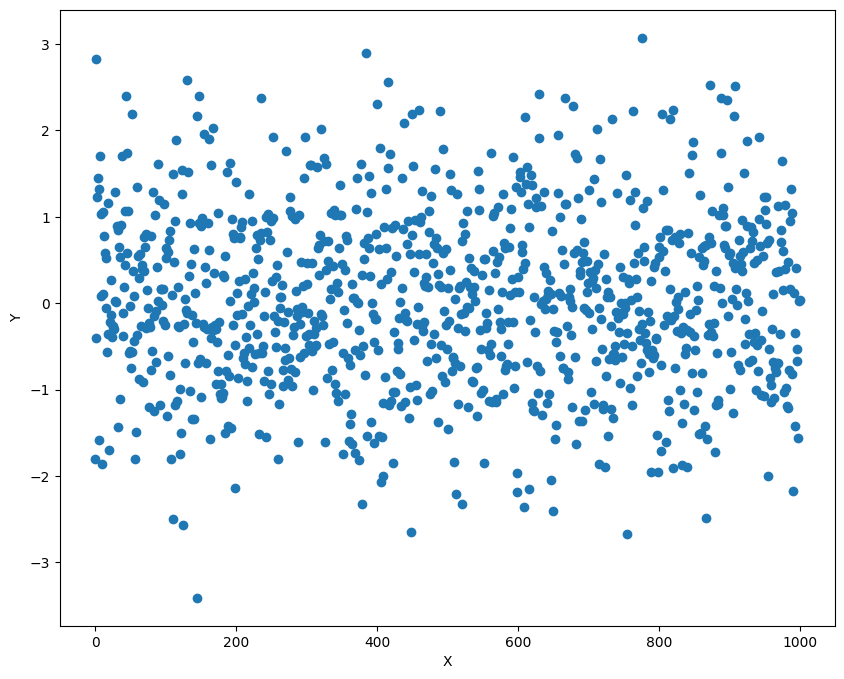

In [5]:
# 生成一维数组，并在图上画出来
# 随机生成n个满足标准正态分布的随机数，均值为0，方差为1
data_num=1000
rand = torch.randn(data_num)
# print(rand)
# 求平均值，平均值为0
m = torch.mean(rand)
print(m)

# 求差值的平方,应为1
the_square = (rand - m)**2
mean = the_square.mean()
print(mean)

# 把图形打出来看
import matplotlib.pyplot as plt #导入画图的程序包
import numpy as np

plt.figure(figsize=(10,8)) #设定绘制窗口大小为10*8 inch
plt.plot(np.arange(0,data_num), rand.numpy(), 'o') 
plt.xlabel('X') #添加X轴的标注
plt.ylabel('Y') #添加Y周的标注
plt.show() #将图形画在下面

### 1.5 ones
https://pytorch.org/docs/stable/generated/torch.ones.html#torch.ones

In [6]:
y = torch.ones(5, 3) #产生一个5*3的Tensor，元素都是1
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

### 1.6 zeros

In [7]:
z = torch.zeros(2, 5, 3) #产生一个5*3的Tensor，元素都是1
z

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

### 1.7 构造一个张量，直接使用数据

In [8]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


### 1.8 创建一个 tensor 基于已经存在的 tensor。

In [9]:
x = x.new_ones(5, 3, dtype=torch.double)      
# new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    
# override dtype!
print(x)                                      
# result has the same size

x_ones = torch.ones_like(x) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.6915, -0.1145, -0.9432],
        [ 0.5176, -1.0899,  0.7902],
        [ 1.3113,  1.0654,  0.3937],
        [ 1.6170, -1.4768,  0.2109],
        [ 1.1613, -0.7821, -0.2574]])
Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 



### 1.9 填充值
https://pytorch.org/docs/stable/generated/torch.Tensor.new_full.html#torch.Tensor.new_full

In [10]:
t = torch.empty((1,1))
# 这个api奇怪的地方，是必须有一个没用的torsor
x = t.new_full((3, 4), 3.141592)
print(x)


tensor([[3.1416, 3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416, 3.1416]])


In [2]:
# 这个api好用
torch.full((2, 4), 2.)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.]])

## 2. tensor遍历

### 2.1 获取tensor的大小

In [11]:
x = torch.ones(15, 13, dtype=torch.double)  
print(x.size())

torch.Size([15, 13])


In [12]:
print(x.shape)

torch.Size([15, 13])


In [13]:
# 这两个其实是一样的
print(x.shape==x.size())

True


### 2.2 获取数组元素

In [14]:
x.shape[0]

15

In [15]:
x.shape[1]

13

In [16]:
x[1,2]==x[1][2]

tensor(True)

### 2.3 遍历

## 3. tensor基本运算

### 3.1 加减
#### 3.2.1 两个形状相同的tensor相加

In [17]:
# 使用+运算符
x = torch.ones(5, 3)
y = torch.ones(5, 3)
print(x + y)



tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [18]:
# 使用函数
print(torch.add(x, y))

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [19]:
# 加法: 提供一个输出 tensor 作为参数
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [20]:
# 加法: in-place
# adds x to y
y.add_(x)
print(y)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


#### 3.2.2 tensor加数字

In [21]:
x = torch.ones(5, 3)
z = x+2
print(z)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


#### 3.2.3 tensor加一列tensor

In [22]:
x = torch.ones(5, 3)
y = torch.ones(5,1)
print(x)
print(y)
print(x+y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


#### 3.2.4 tensor加一行tensor

In [23]:
x = torch.ones(5, 3)
y = torch.ones(1,3)
print(x)
print(y)
print(x+y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


### 3.2 乘法

#### 3.2.1 两个形状相同的tensor相乘

In [24]:
# 使用*运算符
x = torch.tensor([[2,3,4],
                  [4,5,6]])
y = torch.tensor([[1,2,1],
                  [2,3,2]])
# 相同位置的数，依次相乘
print(x * y)

tensor([[ 2,  6,  4],
        [ 8, 15, 12]])


#### 3.2.2 tensor乘以数字

In [25]:
x = torch.ones(5, 3)
z = x*2
print(z)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


#### 3.2.3 tensor乘以一行tensor

In [26]:
x = torch.tensor([[2,3,4],
                  [4,5,6]])
y = torch.tensor([[1,2,1]
                  ])
print(x)
print(y)
print(x*y)

tensor([[2, 3, 4],
        [4, 5, 6]])
tensor([[1, 2, 1]])
tensor([[ 2,  6,  4],
        [ 4, 10,  6]])


#### 3.2.4 tensor乘以一列tensor

In [27]:
x = torch.tensor([[2,3,4],
                  [4,5,6]])
y = torch.tensor([[2],
                  [3]])
print(x)
print(y)
print(x*y)

tensor([[2, 3, 4],
        [4, 5, 6]])
tensor([[2],
        [3]])
tensor([[ 4,  6,  8],
        [12, 15, 18]])


#### 3.2.5 (m,1)的矩阵*(1,n)的矩阵

In [28]:
# 数组的常规乘法
# 二维数组，三行1列
t1=torch.tensor([[1],[3],[5]])
print(t1)
# 二维数组，1行5列
t2=torch.tensor([[2,4,6,8,10]])
print(t2)
# 两个矩阵可以这样乘，(m,1)的矩阵*(1,n)的矩阵，变成(m,n)的矩阵
t3=t1*t2
print(t3)


tensor([[1],
        [3],
        [5]])
tensor([[ 2,  4,  6,  8, 10]])
tensor([[ 2,  4,  6,  8, 10],
        [ 6, 12, 18, 24, 30],
        [10, 20, 30, 40, 50]])


### 3.3 除法
#### 3.3.1 两个相同形状的tensor相除

In [29]:
# 使用/运算符
x = torch.tensor([[2,3,4],
                  [4,5,6]])
y = torch.tensor([[1,2,1],
                  [2,3,2]])
# 相同位置的数，依次相除
print(x / y)


tensor([[2.0000, 1.5000, 4.0000],
        [2.0000, 1.6667, 3.0000]])


#### 3.3.2 tensor除以数字

In [30]:
x = torch.ones(5, 3)
z = x/2
print(z)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])


## 4. tensor变换

### 4.1 view
https://pytorch.org/docs/stable/generated/torch.Tensor.view.html?highlight=view#torch.Tensor.view

In [31]:
x = torch.randn(4, 4)

y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())
print(x)
print(y)
print(z)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])
tensor([[-0.2621, -0.2659,  2.3953, -0.5844],
        [ 0.7092,  2.1162,  0.5920, -1.1866],
        [-0.9413, -0.5077, -0.6165,  0.5159],
        [-0.9117,  0.0310,  0.9826,  0.4093]])
tensor([-0.2621, -0.2659,  2.3953, -0.5844,  0.7092,  2.1162,  0.5920, -1.1866,
        -0.9413, -0.5077, -0.6165,  0.5159, -0.9117,  0.0310,  0.9826,  0.4093])
tensor([[-0.2621, -0.2659,  2.3953, -0.5844,  0.7092,  2.1162,  0.5920, -1.1866],
        [-0.9413, -0.5077, -0.6165,  0.5159, -0.9117,  0.0310,  0.9826,  0.4093]])


### 4.2 转置

In [32]:
x = torch.randn(5, 3)
y= x.t()
print(x)
print(y)

tensor([[-0.5109,  0.1133, -0.5823],
        [ 0.4639, -0.6656, -1.2285],
        [-0.5686,  0.1136,  1.1373],
        [-0.2099, -0.3775, -1.0851],
        [-0.9538,  0.0262, -1.5611]])
tensor([[-0.5109,  0.4639, -0.5686, -0.2099, -0.9538],
        [ 0.1133, -0.6656,  0.1136, -0.3775,  0.0262],
        [-0.5823, -1.2285,  1.1373, -1.0851, -1.5611]])


### 4.3 expand
https://pytorch.org/docs/stable/generated/torch.Tensor.expand.html#torch.Tensor.expand

In [33]:
x = torch.tensor([[1], [2], [3]])
x.size()
torch.Size([3, 1])
x.expand(3, 4)

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [34]:
x.expand(-1, 4)   # -1 means not changing the size of that dimension

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

### 4.4 torch.squeeze
去掉维度为1的维度
https://pytorch.org/docs/stable/generated/torch.squeeze.html#torch.squeeze

In [4]:
# 自动，去掉所有1维
x = torch.zeros(2, 1, 2, 1, 2)
print(x.size())
y = torch.squeeze(x)
print(y.size())

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 2])


In [5]:
# 指定维度
y = torch.squeeze(x, 0)
print(y.size())
y = torch.squeeze(x, 1)
print(y.size())
y = torch.squeeze(x, (1, 2, 3))
print(y.size())

torch.Size([2, 1, 2, 1, 2])
torch.Size([2, 2, 1, 2])
torch.Size([2, 2, 2])


## 5. 矩阵运算

### 5.1 乘法实例1

https://wims.univ-cotedazur.fr/wims/wims.cgi?session=EM382E9DB4.1&+lang=cn&+module=tool%2Flinear%2Fmatmult.cn
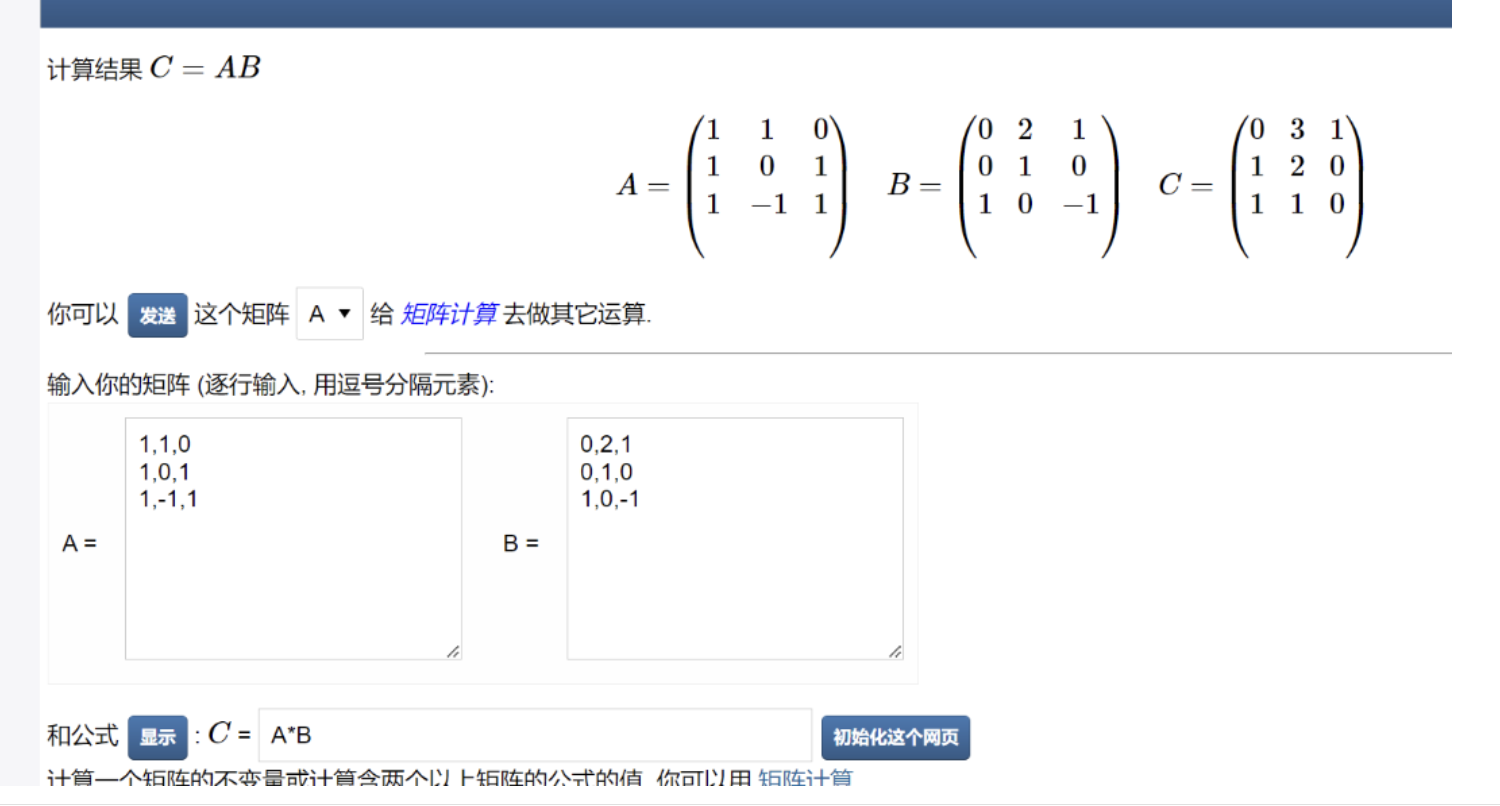

In [35]:
a = torch.tensor([[1,1,0],
                  [1,0,1],
                  [1,-1,1]])
b = torch.tensor([[0,2,1],
                  [0,1,0],
                  [1,0,-1]])
c=a.mm(b)
c

tensor([[0, 3, 1],
        [1, 2, 0],
        [1, 1, 0]])

### 5.2 乘法实例2
第一个矩阵的列数必须等于第二个矩阵的行数，

结果矩阵，是第一个矩阵的行数和第二个矩阵的列数

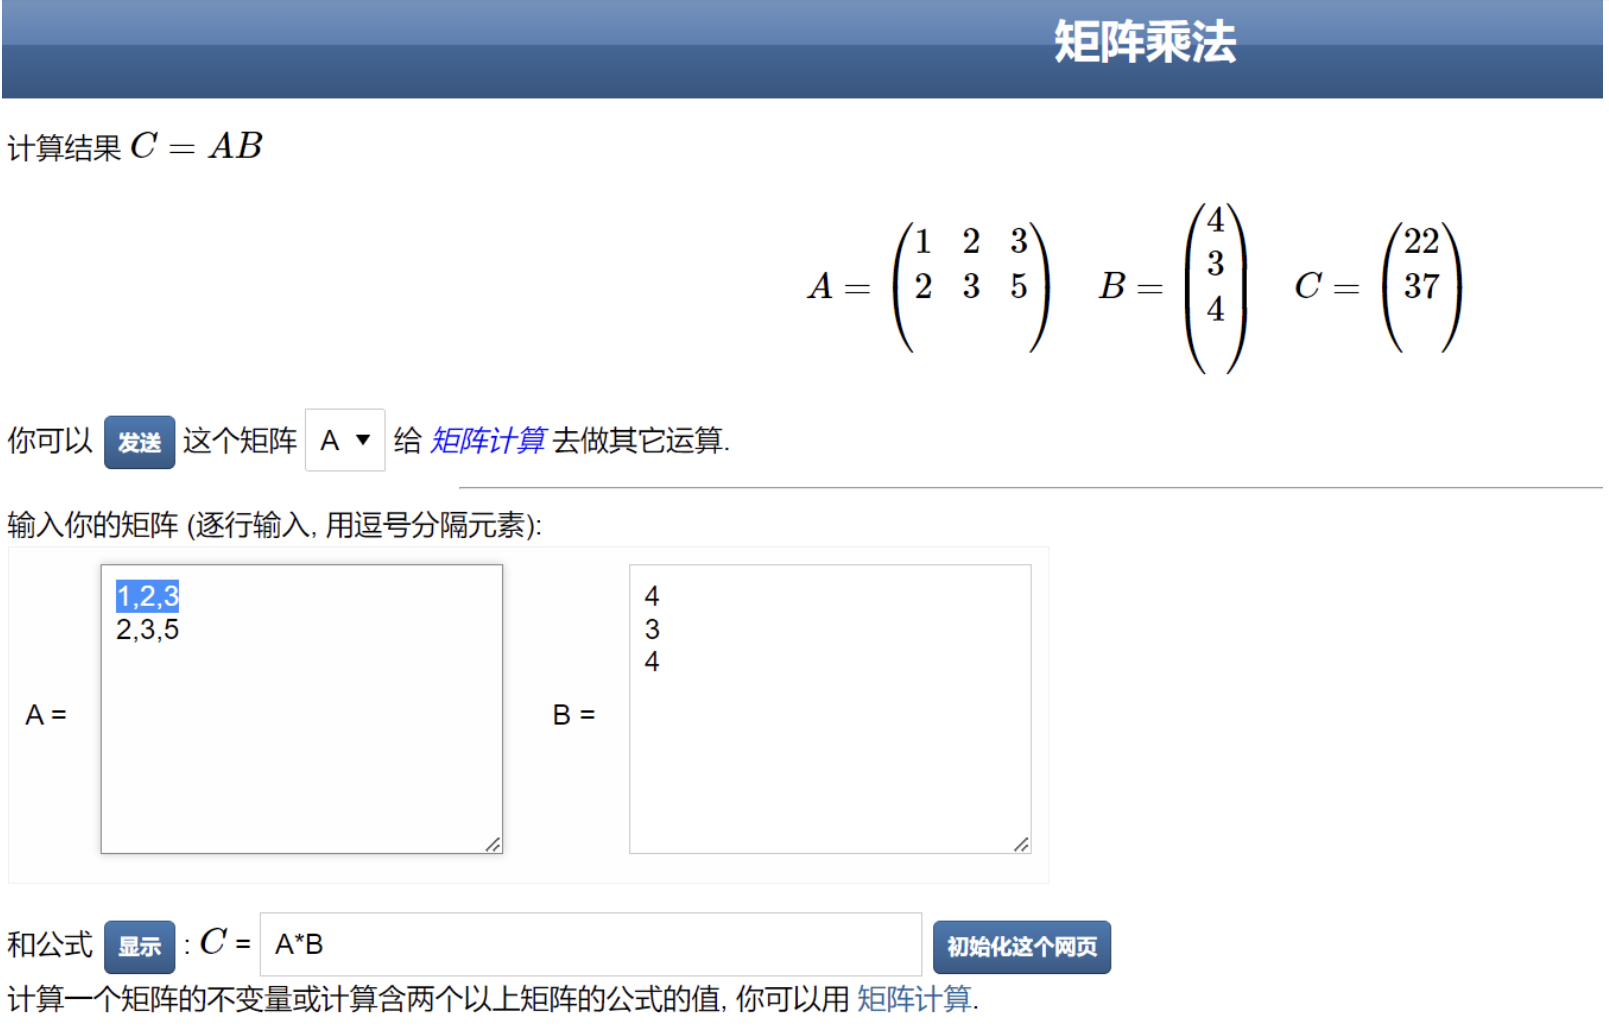

In [36]:
a = torch.tensor([[1,2,3],
                  [2,3,5]])
b = torch.tensor([[4],
                  [3],
                  [4]])
c=a.mm(b)
c

tensor([[22],
        [37]])

## 6. Tensor与numpy.ndarray之间的转换

### 6.1 numpy转为tensor
https://pytorch.org/docs/stable/generated/torch.from_numpy.html?highlight=from_#torch.from_numpy

In [37]:
import numpy as np #导入numpy包
a = np.ones([5, 3]) #建立一个5*3全是1的二维数组（矩阵）
b = torch.from_numpy(a) #利用from_numpy将其转换为tensor
b

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

### 6.2 tensor转为numpy

In [38]:
b = torch.tensor([[4],
                  [3],
                  [4]])
b.numpy()

array([[4],
       [3],
       [4]], dtype=int64)

In [39]:
# 如果是require_grad类型的tensor,则需要调用data.numpy()
b = torch.tensor([[4],
                  [3],
                  [4]],dtype = torch.float, requires_grad = True)
b.data.numpy()

array([[4.],
       [3.],
       [4.]], dtype=float32)

## 7. tensor的其它操作

### 7.1 mean
平均数

In [40]:
a = torch.ones((5, 3), requires_grad=True)

b = a.mean()
print(b)


tensor(1., grad_fn=<MeanBackward0>)


### 7.2 挪到gpu上

In [41]:
a = torch.ones((5, 3), requires_grad=True)
print(f"Device tensor is stored on: {a.device}")
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    b = a.to("cuda")
    print(f"Device tensor is stored on: {b.device}")

Device tensor is stored on: cpu
Device tensor is stored on: cuda:0


### 7.3 Single-element tensors 

In [42]:
# tensor可以不是数组，直接是一个元素
x = torch.tensor(1.)
print(x, type(x))
x_item = x.item()
print(x_item, type(x_item))

tensor(1.) <class 'torch.Tensor'>
1.0 <class 'float'>


In [43]:
a = torch.ones((5, 3), requires_grad=True)
# 通过sum或者mean,也可以得到一个Single-element tensor
agg = a.sum()
print(agg, type(agg))
agg_item = agg.item()
print(agg_item, type(agg_item))

tensor(15., grad_fn=<SumBackward0>) <class 'torch.Tensor'>
15.0 <class 'float'>


### 7.4 scatter
https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html#torch.Tensor.scatter_
看不懂，src（最后一个参数）为单个值的大概懂了

In [8]:
# 给2*4数组的，第2和第3个元素，换成1.23
torch.full((2, 4), 2.).scatter_(1, torch.tensor([[2], [3]]),1.23)

tensor([[2.0000, 2.0000, 1.2300, 2.0000],
        [2.0000, 2.0000, 2.0000, 1.2300]])

In [11]:
# one hot编码
# 将2转换为one hot编码
torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(2), value=1)

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

## 8. indexing and slicing

In [44]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
# 给第一列赋值
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### 列操作

In [51]:
arr=[[10,11],[20,22]]
t = torch.tensor(arr)
print(t)

tensor([[10, 11],
        [20, 22]])


In [52]:
print(t[:,0])


tensor([10, 20])


In [53]:
# 给第一列赋值，每个值除以2
t[:,0] = t[:,0]/2
print(t)

tensor([[ 5, 11],
        [10, 22]])
